## **Projeto analisanda dados da Amazon**
### <font color = '#073763' > **Analise de Sentimento e WordCloud**
   *by [Guilherme Lima](https://www.linkedin.com/in/gui-lima-oficial/)*

### **Objetivo do projeto**
- Nesse projeto o nosso objetivo vai ser analisar como está andando os feedbacks dos nossos usuarios da amazon, atraves dos seus textos escritos vamos poder realizar analises de palavras mais positivas, palavras mais negativas e qual palavra eles mais usam no geral, com o objetivo de fonecer mais key words para a equipe de SO por exemplo.

### Quais perguntas nossos dados vamos nos responder?
- Analise de sentimento atraves das palavras positivas e negativas dadas pelos nossos clientes.
- Analise de Score, como está indo a avaliação que os clientes dão
- Analise de quantidade de palavras que eles usam
- E o costume de palavras dos nossos clientes.

### Como os dados estão sendo disponibilizados.
- Os dados estão sendo disponibilizados em um banco de dados do sqlite, o então para acessalo será necessario estabelecer uma conexão e executar uma query para me trazer as informações que eu vou querer.

### Dicionario de colunas
- Id
- ProductId: Codigo que indentifica o produto
- UserId: Codigo que indentifica o cliente
- ProfileName: Nome de usuario
- HelpfulnessNumerator: Número de usuários que acharam a avaliação útil.
- HelpfulnessDenominator: Número de usuários que indicaram se acharam a avaliação útil ou não
- Score: Sadisfação de 1 a 5
- Time: Carimbo de data/hora da revisão
- Summary: Resumo
- Text — Texto da avaliação

### Primeira etapa do nosso projeto: 
- Se conectar aos dados do meu sqlite e obter as informações que eu vou usar.

- Importando as bibliotecas necessarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import plotly.express as px

- Estabelecendo uma conexão com meu banco de dados

In [2]:
#Se conentando no meu banco de dados SQlITE
db = sqlite3.connect('database.sqlite')

In [3]:
#Vefiricando o tipo da minha conexão
type(db)

sqlite3.Connection

In [4]:
#Executando uma query com o pandas, para selecionar todos os meus dados da minha tabela Reviews do meu DataBase conectado acima.
df= pd.read_sql_query('SELECT * FROM Reviews',db)

In [5]:
#Exibindo minhas informações
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
#Verificando o numero de linhas e colunas do meu Df
df.shape

(568454, 10)

### Segunda etapa do nosso projeto: Realizar uma analise de Sentimento.

### O que é analise de sentimento?
- A análise de sentimentos é a tarefa computacional de determinar automaticamente quais sentimentos um escritor está expressando no texto.
Alguns exemplos de aplicações para análise de sentimentos incluem:

1. Analisando a discussão nas mídias sociais em torno de um determinado tópico
2. Avaliando as respostas da pesquisa
3. Determinar se as avaliações do produto são positivas ou negativas

A análise de sentimentos não é perfeita. Também não pode dizer por que um escritor está se sentindo de uma determinada maneira. No entanto, pode ser útil resumir rapidamente algumas qualidades do texto, especialmente se você tiver tanto texto que um leitor humano não possa analisá-lo. Para este projeto, o objetivo é classificar as avaliações de alimentos com base no texto dos clientes.

- Para realizar essa analise sera necessario importa uma biblioteca chamada textblod

In [7]:
#Importando a biblioteca
from textblob import TextBlob

In [8]:
#Pegando o primeiro resumo
text= df['Summary'][0]
#Imprimindo
text

'Good Quality Dog Food'

In [9]:
#Analisando o sentimento
TextBlob(text).sentiment.polarity

0.7

In [10]:
#Criando uma lista vazia, que vai receber minhas analises polarity
polarity=[]

#pecorrendo minha lista de resumos
for i in df['Summary']:
    #Tentando fazer o append. do Textobloc senti... na minha lista vazia
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
        #Caso não aja um resumo então ele vai colocar que o polarity e 0
    except:
        polarity.append(0)

In [11]:
#Lendo minha quantidade de polarity
len(polarity)

568454

In [12]:
#Criando uma copia do meu DataFrame já que vou colocar informações adicionais nele, para nao danificar o original eu vou criar outro.
data = df.copy()

In [13]:
#Exibindo como está as informações
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [14]:
#inserindo a minha nova coluna de polarity
data['Polarity']= polarity

In [15]:
#Exibindo o novo dataframe com as informaçoes de Polarity
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

### Analisando as palavras positivas

In [16]:
#Filtrando meu Dataframe para obter apenas os valores positivos, que tem uma polarity maior que zero, pois isso significa
# e uma critica posiva ou tem grandes chances de ser 
data_positive= data[data['Polarity']> 0]

In [17]:
#exibindo a quantidade de linhas e colunas que eu tenho no nos meus dados positivos.
data_positive.shape

(331665, 11)

In [18]:
#Importando minha biblioteca de WordCloud ela que vai me possibilitar analisar as palavras mais usadas pelos meus clientes.
# E tambem chamando a STOPWORDS que serve para retirar palavras irrelevantes, será mais explicado mais pra frente
from wordcloud import WordCloud,STOPWORDS

In [19]:
#Definindo a biblioteca em uma variavel.
stopwords = set(STOPWORDS)

In [20]:
#Verificando.
data_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...  0.700000  
4  Great taffy at a great price.  There was a wid...  0.800000  
5  I got a wild hair for taffy and ordered this f...  0.600000  
6  This saltwater taffy had great flavors and was...  0.358333  
7  This taffy is so good.  It is very soft and ch...  1.000000

In [21]:
#Usando o ' '.join para conseguir unir meus textos, o .join ele une os textos e separa pelo limitado qeu eu colocar na frente
# no nosso caso o ' '
total_text = (' '.join(data_positive['Summary']))

In [22]:
#Verificando a quantidade de texto que temos.
len(total_text)

8465012

In [23]:
#Verificando os primeiros resultados
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [24]:
#Importando a biblioteca Re e executando o comnado que limpar coisas indesejadas dos meus valores, como \'
import re
total_text= re.sub('[^a-zA-Z]', ' ',total_text)

In [25]:
#Vefificando
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [26]:
#Como podemos ver, há espaçoes adicionais então vamos utilizar o re.sub para subsituir tambem
total_text=re.sub(' +',' ',total_text)

In [27]:
#Verificando
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

In [28]:
#Definindo minha WordCloud
word_cloud= WordCloud(
    #Tamanho
    width=1000,
    #Altura
    height=500,
    #Retirar palavras irrelevantes.
    stopwords=stopwords).generate(total_text)


(-0.5, 999.5, 499.5, -0.5)

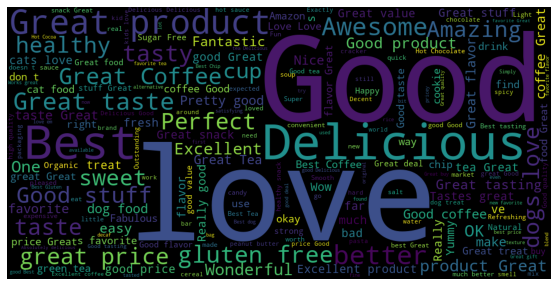

In [29]:
#Executando a WordCloud
plt.figure(figsize=(15,5))
plt.imshow(word_cloud)
plt.axis('off')

### Analisando as palavras Negativa

In [30]:
#Pegando os valores negativos
data_negative= data[data['Polarity']< 0]

In [31]:
#Juntando os textos com um seperador de espaço
total_text2 = (' '.join(data_negative['Summary']))

In [32]:
#Removendo itens indesejados
total_text2= re.sub('[^a-zA-Z]', ' ',total_text2)

In [33]:
#Removendo espaçoes adicionais
total_text2=re.sub(' +',' ',total_text2)

In [34]:
#exibindo os primeiros resultados
total_text2[0:1000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

In [35]:
#Definindo a WordCloud
word_cloud= WordCloud(width=1000,
                      height=500,
                      stopwords=stopwords).generate(total_text2)

(-0.5, 999.5, 499.5, -0.5)

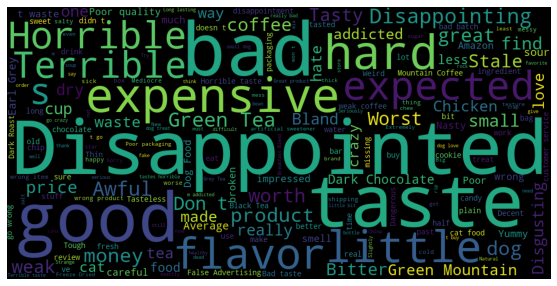

In [36]:
#Mostrando a WordCloud
plt.figure(figsize=(15,5))
plt.imshow(word_cloud)
plt.axis('off')

> ---

### Terceira Etapa do Projeto: analisando os top 10 clientes que mais fizeram resumo, textos, scrore(mais alto) e quantidade de produtos comprados

In [37]:
#Df principal
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [38]:
#Verificando os usernames(Usuarios) unicos do meu dataframe
df['UserId'].nunique()

256059

In [39]:
#Agrupando meus dados e trazendo a contagem de resumos, textos, score (média) e produtos. 
# e no fim usando um sort_values por quantidade de textos que ele fez e colocando do maior pro menor.
dados_user=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [40]:
#Exibindo meus dados
dados_user.head()

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256

In [41]:
#Renomenado as colunas 
dados_user.columns=['Numeros de Resumos','Numeros de textos feitos','Pontuação média(Score)','Numero de Produtos adquiridos']

In [42]:
#Exibindo meus dados
dados_user

Numeros de Resumos  Numeros de textos feitos  \
UserId                                                         
A3OXHLG6DIBRW8                 448                       448   
A1YUL9PCJR3JTY                 421                       421   
AY12DBB0U420B                  389                       389   
A281NPSIMI1C2R                 365                       365   
A1Z54EM24Y40LL                 256                       256   
...                            ...                       ...   
A2HROKQO0GA5AF                   1                         1   
A2HROR28DMJV2W                   1                         1   
A2HRR8CO2Y20G8                   1                         1   
A2HRSML93IK9TR                   1                         1   
AZZZOVIBXHGDR                    1                         1   

                Pontuação média(Score)  Numero de Produtos adquiridos  
UserId                                                                 
A3OXHLG6DIBRW8                4.535714                            448  
A1YUL9PCJR3JTY                4.494062                            421  
AY12DBB0U420B                 4.647815                            389  
A281NPSIMI1C2R                4.841096                            365  
A1Z54EM24Y40LL                4.453125                            256  
...                                ...                            ...  
A2HROKQO0GA5AF                3.000000                              1  
A2HROR28DMJV2W                5.000000                              1  
A2HRR8CO2Y20G8                5.000000                              1  
A2HRSML93IK9TR                5.000000                              1  
AZZZOVIBXHGDR                 2.000000                              1  

[256059 rows x 4 columns]

In [43]:
#Pegando meu Top 10 Users, preciso pegar com o .index para dar certo
top_10_user = dados_user.index[0:10]

In [44]:
#Exibindo os top 10 users
top_10_user

Index(['A3OXHLG6DIBRW8', 'A1YUL9PCJR3JTY', 'AY12DBB0U420B', 'A281NPSIMI1C2R',
       'A1Z54EM24Y40LL', 'A1TMAVN4CEM8U8', 'A2MUGFV2TDQ47K', 'A3TVZM3ZIXG8YW',
       'A3PJZ8TU8FDQ1K', 'AQQLWCMRNDFGI'],
      dtype='object', name='UserId')

In [45]:
#Pegando a altura das minhas barras, ela vai ser a quantidade de compras que o cliente fez
valores_top_10 = dados_user['Numero de Produtos adquiridos'][0:10]

In [46]:
#Exibindo os top 10 valores
valores_top_10

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: Numero de Produtos adquiridos, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

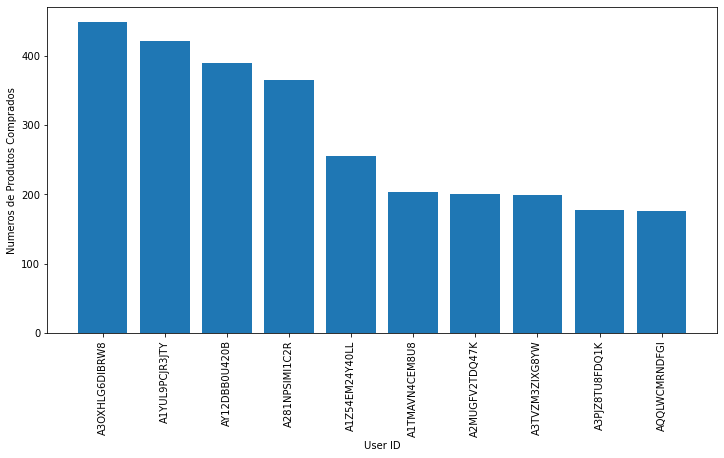

In [47]:
#Utilizando meu plt.bar(Grafico de barra) para mostrar visualmente meu Top 10
plt.figure(figsize=(12,6))
plt.bar(
    #Eixo x
    top_10_user,
    #Eixo y
    valores_top_10,
    label='Usuarios Mais Recomendados'
)
plt.xlabel('User ID')
plt.ylabel('Numeros de Produtos Comprados')
plt.xticks(rotation='vertical')

In [48]:
#Fazendo um grafico mais bonito
px.bar(
    x=top_10_user,
    y=valores_top_10,
    title='Usuarios Que Mais Compraram (Por Quantidade de compras)',
    template=('plotly_dark')
)

- Imagem

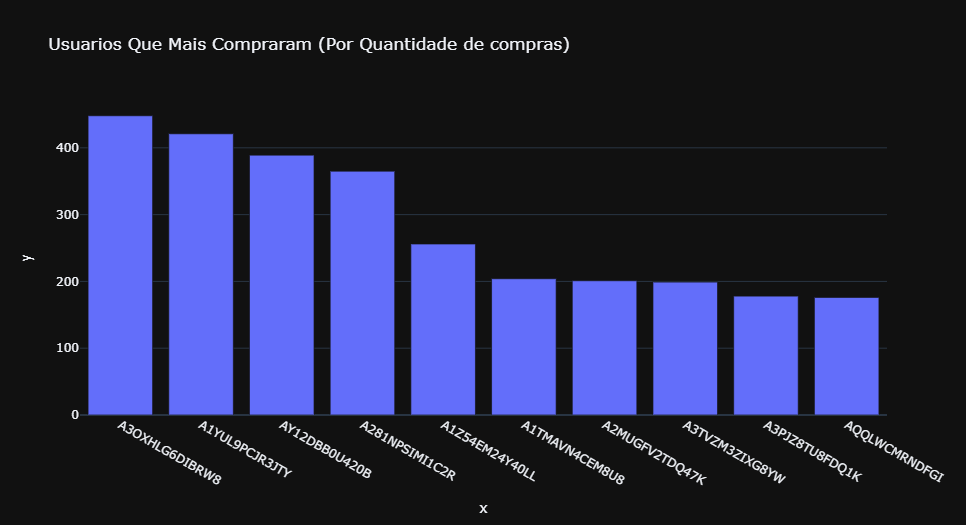

- Analise: Esses sãos os top 10 clientes que mais compraram e que mais a amazon deveriam realizar promoões e oferecer seus produtos.

> ---

### Quarta Fase: Analise dos feedbacks dados pelos usuarios

- Para realizar essa analise de feedback dos meus usarios eu vou pegar uma amostra simples dos meus graficos, pois como são muitos dados e eu vou ter que realizar muitas modificações, as coisas ia ficar muito lenta e desnecessaria para um projeto assim, então vou utilizar uma amostra.

In [49]:
#Primeira forma de pegar o exemplo com valores aleatorios.
df.sample(n=2000)

Id   ProductId          UserId                   ProfileName  \
128016  128017  B0000TSC9M  A3FBVUKMYENIEQ                       E. Sorn   
332336  332337  B001EO66S6  A1ZMSCQTQ9JJLF               Leslie F. Moore   
239052  239053  B003WNXFZE  A3EWHHX8DUMJOQ                          Yary   
245446  245447  B003VD8DSO  A1HLCZSEE3C0MD                         Rocky   
217716  217717  B000CQG87Q  A2N5SEPUYGUQUO                 J. Moore "JM"   
...        ...         ...             ...                           ...   
60518    60519  B003QNJYXM   AFQTHXHV9HE9V                        ahorne   
25447    25448  B0051TPWUI  A1TMAVN4CEM8U8                        Gunner   
360056  360057  B000R7ROKK   AUW3FDK47K82G                   L. Barnhart   
227652  227653  B001FSJCPK  A37Y7CMDRGXMJU                    Knightbaby   
514991  514992  B007XSZWAK  A16WPA6JV83YXT  Sandra Trolinger "trolsgirl"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
128016                     2                       2      5  1140652800   
332336                     0                       0      2  1315440000   
239052                     4                       4      4  1289174400   
245446                     1                       1      5  1310515200   
217716                     0                       0      5  1313712000   
...                      ...                     ...    ...         ...   
60518                      0                       0      4  1346976000   
25447                      1                       1      5  1331251200   
360056                     2                       2      5  1215648000   
227652                     2                       2      5  1308096000   
514991                     2                       3      2  1290902400   

                                               Summary  \
128016                                    Kitty Kaviar   
332336                                     Blondie Mix   
239052  the perfect portion, but some arrived leaking.   
245446                             My Dog Loves These!   
217716                            Excellent Ginger Tea   
...                                                ...   
60518           Best tasting energy shot I've ever had   
25447                           My 3rd favorite flavor   
360056                          Sun Chips Garden Salsa   
227652                    GREATEST THING EVER INVENTED   
514991                  Not what I thought it would be   

                                                     Text  
128016  My cats are addicted to this stuff!  They actu...  
332336  The delivery was on time and produce was well ...  
239052  These juice containers are the perfect portion...  
245446  These cookies are just the right size for a sm...  
217716  I recently gave up coffee, but still felt I ne...  
...                                                   ...  
60518   I was skeptical about 5 hour energy... but I h...  
25447   Diamond Almonds<br />Almonds are a good source...  
360056  I love these chips, the flavor is wonderful, n...  
227652  I was completely skeptical of this product bec...  
514991  This coffee base of Latin American beans is fo...  

[2000 rows x 10 columns]

In [50]:
#Segunda forma de pegar uma forma simples do dados (Dessa vez ordenados os primeiros 2000 mil)
amostra_simples=df[0:2000]

In [51]:
#Exibindo a amostra
amostra_simples

Id   ProductId          UserId  \
0        1  B001E4KFG0  A3SGXH7AUHU8GW   
1        2  B00813GRG4  A1D87F6ZCVE5NK   
2        3  B000LQOCH0   ABXLMWJIXXAIN   
3        4  B000UA0QIQ  A395BORC6FGVXV   
4        5  B006K2ZZ7K  A1UQRSCLF8GW1T   
...    ...         ...             ...   
1995  1996  B001E5E29A  A3IJNH61DY5N9K   
1996  1997  B001E5E29A  A35W3JQYP0M655   
1997  1998  B001E5E29A  A3CLWZGMC7M9Z1   
1998  1999  B001E5E29A  A2V6P1FKRHCVQQ   
1999  2000  B001E5E29A   AZ9N3928BGQ0E   

                                       ProfileName  HelpfulnessNumerator  \
0                                       delmartian                     1   
1                                           dll pa                     0   
2                  Natalia Corres "Natalia Corres"                     1   
3                                             Karl                     3   
4                    Michael D. Bigham "M. Wassir"                     0   
...                                            ...                   ...   
1995                                  Sharon Allan                    10   
1996                       Ambergris "John Thomas"                     7   
1997                     Hippie2MARS "Hippie2MARS"                     6   
1998                                    S. Jackson                     8   
1999  J. Nachison "long-time SF and history lover"                     7   

      HelpfulnessDenominator  Score        Time  \
0                          1      5  1303862400   
1                          0      1  1346976000   
2                          1      4  1219017600   
3                          3      2  1307923200   
4                          0      5  1350777600   
...                      ...    ...         ...   
1995                      11      5  1265846400   
1996                       7      5  1279929600   
1997                       6      4  1250640000   
1998                       9      4  1265760000   
1999                       8      5  1206835200   

                             Summary  \
0              Good Quality Dog Food   
1                  Not as Advertised   
2              "Delight" says it all   
3                     Cough Medicine   
4                        Great taffy   
...                              ...   
1995  Great Waffles for us non-cooks   
1996  Excellent Fluffy Pancakes.....   
1997                  Good Basic Mix   
1998     Good pancakes, lots of work   
1999          waffles, schmaffles !!   

                                                   Text  
0     I have bought several of the Vitality canned d...  
1     Product arrived labeled as Jumbo Salted Peanut...  
2     This is a confection that has been around a fe...  
3     If you are looking for the secret ingredient i...  
4     Great taffy at a great price.  There was a wid...  
...                                                 ...  
1995  I have to laugh at the reviews that said it wa...  
1996  I had read some favorable reviews of this panc...  
1997  I was expecting great things based on the revi...  
1998  I love this pancake mix.  I bought my first ca...  
1999  What can i say??  They are wonderful, and the ...  

[2000 rows x 10 columns]

In [52]:
#Verificando se tem valores nulos na nossa amostra
amostra_simples.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [53]:
# Verificando se minhas amostras tem valores duplicados
amostra_simples.duplicated().sum()

0

- Essas verificaçoes foram realizadas para verificar a intregridade dos dados, para nao haver valores duplicados e temos uma analise de feedback mais acertiva.

In [54]:
#Pegando meu primeiro texto
amostra_simples['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [55]:
#Quebrando meu texto palavra por palavra
amostra_simples['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [56]:
#Lendo a quantidade de palavras que tem no meu texto
len(amostra_simples['Text'][0].split(' '))

49

In [57]:
#Para automaticar esse processo, vamos fazer uma função que vai ler a quantidade de palavras do meu df

def Calc_len(texto):
    return len(texto.split(' '))

In [58]:
#Aplicando a função usando o apply
amostra_simples['Qtd_Palavras'] = amostra_simples['Text'].apply(Calc_len)

<ipython-input-58-a34330eed522>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
#Exibindo a coluna com a quantidade de palavras.
amostra_simples

Id   ProductId          UserId  \
0        1  B001E4KFG0  A3SGXH7AUHU8GW   
1        2  B00813GRG4  A1D87F6ZCVE5NK   
2        3  B000LQOCH0   ABXLMWJIXXAIN   
3        4  B000UA0QIQ  A395BORC6FGVXV   
4        5  B006K2ZZ7K  A1UQRSCLF8GW1T   
...    ...         ...             ...   
1995  1996  B001E5E29A  A3IJNH61DY5N9K   
1996  1997  B001E5E29A  A35W3JQYP0M655   
1997  1998  B001E5E29A  A3CLWZGMC7M9Z1   
1998  1999  B001E5E29A  A2V6P1FKRHCVQQ   
1999  2000  B001E5E29A   AZ9N3928BGQ0E   

                                       ProfileName  HelpfulnessNumerator  \
0                                       delmartian                     1   
1                                           dll pa                     0   
2                  Natalia Corres "Natalia Corres"                     1   
3                                             Karl                     3   
4                    Michael D. Bigham "M. Wassir"                     0   
...                                            ...                   ...   
1995                                  Sharon Allan                    10   
1996                       Ambergris "John Thomas"                     7   
1997                     Hippie2MARS "Hippie2MARS"                     6   
1998                                    S. Jackson                     8   
1999  J. Nachison "long-time SF and history lover"                     7   

      HelpfulnessDenominator  Score        Time  \
0                          1      5  1303862400   
1                          0      1  1346976000   
2                          1      4  1219017600   
3                          3      2  1307923200   
4                          0      5  1350777600   
...                      ...    ...         ...   
1995                      11      5  1265846400   
1996                       7      5  1279929600   
1997                       6      4  1250640000   
1998                       9      4  1265760000   
1999                       8      5  1206835200   

                             Summary  \
0              Good Quality Dog Food   
1                  Not as Advertised   
2              "Delight" says it all   
3                     Cough Medicine   
4                        Great taffy   
...                              ...   
1995  Great Waffles for us non-cooks   
1996  Excellent Fluffy Pancakes.....   
1997                  Good Basic Mix   
1998     Good pancakes, lots of work   
1999          waffles, schmaffles !!   

                                                   Text  Qtd_Palavras  
0     I have bought several of the Vitality canned d...            49  
1     Product arrived labeled as Jumbo Salted Peanut...            31  
2     This is a confection that has been around a fe...            99  
3     If you are looking for the secret ingredient i...            43  
4     Great taffy at a great price.  There was a wid...            30  
...                                                 ...           ...  
1995  I have to laugh at the reviews that said it wa...            94  
1996  I had read some favorable reviews of this panc...           346  
1997  I was expecting great things based on the revi...            52  
1998  I love this pancake mix.  I bought my first ca...            88  
1999  What can i say??  They are wonderful, and the ...            29  

[2000 rows x 11 columns]

In [60]:
#Verificando a distribuição de palavras com meu grafico de boxplot
px.box(
    #Dados
    amostra_simples,
    #Valores
    y='Qtd_Palavras'
)

- Imagem

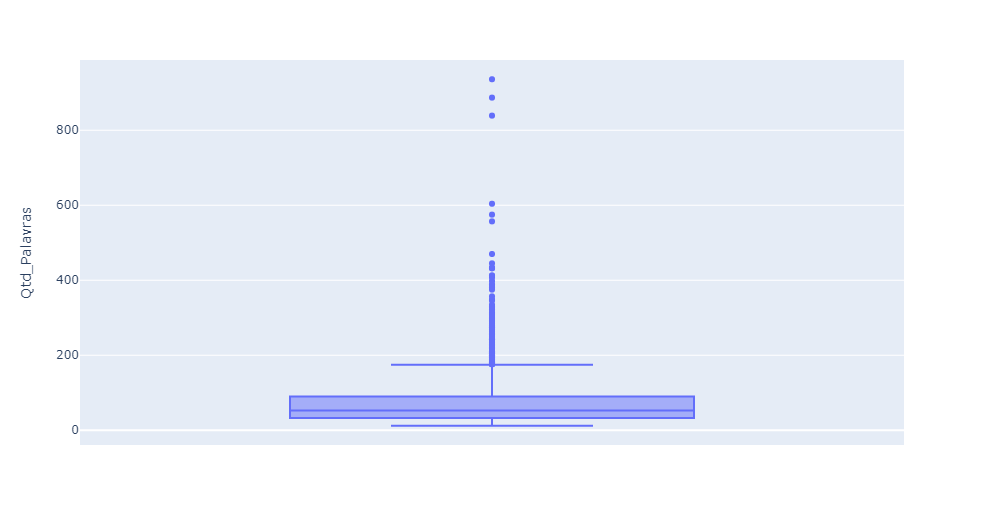

- Podemos ver que a média de palavras que os nosso clientes usam e de 50 - 55 palavras, essa analise nos diz que os nossos clientes no geral, não perdem tanto tempo escrevendo os textos deles, pode ser por que gostaram do produto, então não tem muito o que comentar a não ser agradecer. 
- Já no caso de ter mais palavras pode ser pelo fato deles terem uma critica negativa e que precisem estruturar ela e por isso eles escrevem mais, então se levamos em consideração a nossa analise de Score abaixo que a maioria dos valores e 5 podemos então dizer que essa linha de pensamento pode está certa.

### Analisando o Score 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

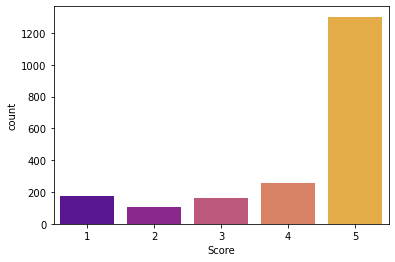

In [61]:
sns.countplot(
    amostra_simples['Score'],
    palette=('plasma')

)

- Como comentado acima a maioria dos nosso resultados está em 5 estrelas, porem vemos que a avalição 1 e maior que a a dois  ea tres então isso quer dizer que quando o cliente não gosta do produto ele realmente não gosta e da 1 estrela(isso no geral).

> ---

### Sexta Fase: Processamento de Texto
- Nesta fase vamos tratar a coluna de texto, removendo valores irrelevantes(stopwords) e fazendo outras mudanças para no fim descobrimos o costume dos nosso clientes

In [62]:
 #Exibindo minha amostra
amostra_simples.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Qtd_Palavras  
0            49  
1            31  
2            99  
3            43  
4            30

In [63]:
#Pegando minha coluna de texto
amostra_simples['Text']

0       I have bought several of the Vitality canned d...
1       Product arrived labeled as Jumbo Salted Peanut...
2       This is a confection that has been around a fe...
3       If you are looking for the secret ingredient i...
4       Great taffy at a great price.  There was a wid...
                              ...                        
1995    I have to laugh at the reviews that said it wa...
1996    I had read some favorable reviews of this panc...
1997    I was expecting great things based on the revi...
1998    I love this pancake mix.  I bought my first ca...
1999    What can i say??  They are wonderful, and the ...
Name: Text, Length: 2000, dtype: object

In [64]:
#Pegando o primeiro valor da coluna texto
amostra_simples['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

### Por que vamos tratar a coluna de texto?
> A coluna de texto sera tratada com o objetivo de tirar excesos e pradonizar o jeito da escrita, pois as pessoas tem sua forma de escrever, as vezes colocando uma palavra com letra maiscula e outra não, então e importante fazer esse tratamento de texto.

In [65]:
#Convertendo em LowerCase(Letra Minuscula) para padronizar
amostra_simples['Text']= amostra_simples['Text'].str.lower()

<ipython-input-65-ab142f435e88>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
#Exibindo meus textos
amostra_simples.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price.  there was a wid...   

   Qtd_Palavras  
0            49  
1            31  
2            99  
3            43  
4            30

### Tratando caracteres especiais
> Em muitos casos vamos ter textos com caracteres especiais como por exemplo !<>_^@#(-__-) entre muitos outros, então vamos ter que retira-los do nosso texto, e para isso vamos usar a nossa biblioteca re, que e uma exelente biblioteca para lidar com padrões

In [67]:
#Pegando um texto aleatorio para testa a remoção de caracteres
amostra_simples['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [68]:
import re
#Executando o comando que retira caracteres especiais, pois vamos trocar esse valores por vazio (' ')
re.sub('[^a-zA-Z]',' ',amostra_simples['Text'][164]) 

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

- Como podemos ver, ele retirou os caracteres especiais, so que ele tambem retirou meu numero, como podemos ver depois do at havia um 100 aqui calories, então o re não vai nos ajudar nesse caso a remover os carateres especiais pois ele retira numeros tambem, que no nosso caso nao pode acontecer.

### Como a biblioteca re não me ajudou nesse caso, (elas sempre ajudam e econimizam muito tempo) porém vamos precisar usar nossa propria logica para remover os caracteres especiais.
- Como vamos fazer isso?
> Vamos fazer uma lista com os caracteres que queresmo remover e utilizar um loop para remover os caracteres que existe nesta lista.

In [69]:
#Definindo as pontuações que eu vou retirar
pontuações = '''$<>_!()[]{}-:;''"/,<>?^~@%*=+.'''

In [70]:
#Adicionando o meu exemplo em uma variavel para podemos utilizar nossa logica para remover pontuações
exemplo = amostra_simples['Text'][164]

In [71]:
#Lista vazia que vai receber minhas informações
lista= ''


#Realizando o loop
for char in exemplo:
    if char not in  pontuações:
        #atribuindo o valor na minha lista
        lista = lista + char
        
#Exibindo o resultado
lista
    

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

- Como podemos notar, removemos todos os caracteres indesejados que queriamos, caso queiramos retirar mais caracteres basta simplesmente adicionar a minha lita de pontuações, e um ponto imporante como não colocamos numeros lá, ele nao remove o nosso '100' assime evitando o problema que tivemos com o **RE**

In [72]:
#Importando a biblioteca de string para conseguir fazer a retiradas de todas as pontuações
import string
pontuações=string.punctuation

In [73]:
#exibindo
pontuações

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
#Executando o tratamento para toda coluna de texto


def Remove_pontuacoes(coluna):
    sem_pontu=''
    
    #Realizando o loop
    for char in coluna:
        if char not in  pontuações:
            #atribuindo o valor na minha lista
            sem_pontu = sem_pontu + char

    #Exibindo o resultado
    return sem_pontu 

In [75]:
#Aplicando a função na minha coluna de texto
amostra_simples['Text']= amostra_simples['Text'].apply(Remove_pontuacoes)

<ipython-input-75-67b3fd61a4d5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
#Exibindo
amostra_simples.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price  there was a wide...   

   Qtd_Palavras  
0            49  
1            31  
2            99  
3            43  
4            30

In [77]:
#Verificando a minha coluna de exemplo acima
amostra_simples['Text'][164]

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [78]:
simples = amostra_simples['Text'][164]

#### Limpando os stopwords
- **Mas o que são strowords?**
Stop words (ou palavras de parada – tradução livre) são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine. Exemplos: as, e, os, de, para, com, sem, foi.
#### Realizando o desafio.
- Para cumprir esse desafio eu vou importar uma biblioteca que já tem uma lista dessas palavras de paradas, pois e uma biblioteca de linguagem natural, então ela vai nos ajudar nesse ponto

In [79]:
#Importando a biblioteca de linguagem natural que vai nos ajudar nesse processo.
import nltk
from nltk.corpus import stopwords

In [80]:
palavras_sep = [palavra for palavra in simples.split(' ') if palavra not in set(stopwords.words('english'))]

In [81]:
palavras_sep

['seriously',
 'product',
 'tasteless',
 'come',
 'much',
 'better',
 'tasting',
 'products',
 '100',
 'calories',
 'better',
 'special',
 'k',
 'bar',
 'cookie',
 'snack',
 'pack',
 'season',
 'combine',
 'something',
 'else',
 'share',
 'flavor']

- Como podemos notar ele retirou todas as minhas stopwords(palavras de parada)

In [82]:
#Realizando a junções das palavras
str=''

for palavra in palavras_sep:
    str= str + palavra
    str= str + ' '
#Exibindo meu str
str

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [83]:
#Definindo uma função que vai fazer esse processo

def Remove_parada_palavras(coluna):
    return' '.join([palavra for palavra in coluna.split(' ') if palavra not in set(stopwords.words('english'))])
    

In [84]:
#Exucutando minha função na minha coluna de texto
amostra_simples['Text'] = amostra_simples['Text'].apply(Remove_parada_palavras)

<ipython-input-84-b85b24e6559b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
#Demostrando meu DataFrame modificado
amostra_simples.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Qtd_Palavras  
0            49  
1            31  
2            99  
3            43  
4            30

> ---

### Analisando de costumes dos clientes

In [86]:
#Exibindo meu DataFrame
amostra_simples.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Qtd_Palavras  
0            49  
1            31  
2            99  
3            43  
4            30

In [87]:
#Pegando um texto
amostra_simples['Text'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

#### Verificando agora se existe algum hiperlink no meu texto
- Primeiro, o que são hiperlinks?
> Antes de mais nada um Hiperlink é exatamente o mesmo que um link, ligação ou hiperligação dentro de um hipertexto, apesar de ser chamado de forma diferente. É simplesmente uma forma de referenciar algo e com a finalidade de ligar um documento a outro documento ou de ligar uma página a outra.
- Em outras palavras, e quando voce coloca um link no texto e click para seguir o que esta 'dentro' dele, como por exemplo 
o meu nome no começo do projeto 'by Guilherme lima' nele tem um hiperlink que leva para o meu linkedin.
- Tambem poder ser links dentro do texto como a pessoa que coloca alguma pagina para voce seguir

In [88]:
#verificando
amostra_simples['Text'].str.contains('http?').sum()

35

In [89]:
#Exibindo essas http
amostra_simples['Text'].str.contains('http?')

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: Text, Length: 2000, dtype: bool

In [90]:
#Como podemos ver, nossas linhas estão limitadas pelas primeiras e pelas ultimos, para ver todas vamos precisar utilizar 
# o pd.set_option
pd.set_option('display.max_rows',2000)

In [91]:
#Exibindo essas http com todas as linhas

# amostra_simples['Text'].str.contains('http?')

- Acima eu vou comentar o codigo, pois quando eu subi pro GitHub ele trouxe os 2 mil resultados que eu pedi pra ele trazer ou seja, muito scroll para baixo -.

In [92]:
#Vefiricando o o texto 21
ex = amostra_simples['Text'][21]
ex

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

- Como podemos ver temos um http

In [93]:
#Importando re para nos ajudar a limpar esses http
url_patten=re.compile(r'href|http.\w+')

In [94]:
#acessando e executando o re para limpar meus http
url_patten.sub(r'',ex)

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

- Como podemos ver, a biblioteca Re e muito poderosa e com o comando certo que passamos ali conseguimos retirar os hrfs, isso mostra o poder do python

In [95]:
def Remove_urls(texto):
    #Importando re para nos ajudar a limpar esses http
    url_patten=re.compile(r'href|http.\w+')
    #acessando e executando o re para limpar meus http
    return url_patten.sub(r'',texto)

In [96]:
#Executando a função na minha coluna de texto
amostra_simples['Text'] = amostra_simples['Text'].apply(Remove_urls)

<ipython-input-96-8bcb06d0737f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
#Sem href agora
amostra_simples['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [98]:
#verificando
amostra_simples['Text'].str.contains('http?').sum()

0

In [99]:
#Em algumas palavras, podemos ver que temos uns certos brs nele, então vamos removelos
amostra_simples['Text'][40]

'variety packs taste greatbr br every morning 030 cents per meal dont understand everyone earth isnt buying stuff upbr br maple brown sugar terrific followed apples cinnamon followed regular dont get tired ole thing taste greatbr br boil water small pot empty packet 2 bowl pour boiling water watch expand 2x sizebr br taste really good takes minutes preparebr br sure everyone earth isnt convenient healthy quick excellent quality extremely cheap'

In [100]:
amostra_simples['Text'][40].replace('br','')

'variety packs taste great  every morning 030 cents per meal dont understand everyone earth isnt buying stuff up  maple own sugar terrific followed apples cinnamon followed regular dont get tired ole thing taste great  boil water small pot empty packet 2 bowl pour boiling water watch expand 2x size  taste really good takes minutes prepare  sure everyone earth isnt convenient healthy quick excellent quality extremely cheap'

In [101]:
#Removendo para todas as linhas
for i in range(len(amostra_simples['Text'])):
     amostra_simples['Text'][i]= amostra_simples['Text'][i].replace('br','')

<ipython-input-101-e786064b1e96>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 >--- 

- E aqui finalizamos o nosso processo de limperaza e tratamento da coluna texto, agora vamos poder analisar o costume dos nossos clintes, então agora começa o processo de analise.

### Vantagens das Nuvens de Palavras:
- Análise de feedback de clientes e funcionários.
- Identificando novas palavras-chave de SEO para segmentar.

In [102]:
#Verificando como meu DataFrame está
amostra_simples.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Qtd_Palavras  
0            49  
1            31  
2            99  
3            43  
4            30

In [103]:
#Realizando a união das palavras com a seraparão por ' '
coment_words = ' '.join(amostra_simples['Text'])

In [104]:
#Definindo o stopwords
stopwords = set(STOPWORDS)

In [105]:
#Usando a WordCloud para ver o costume de palavras mais usados pelos nosso clientes
nuvem= WordCloud(
width=800,
height=800,
background_color ='white',
stopwords=stopwords).generate(coment_words)

(-0.5, 799.5, 799.5, -0.5)

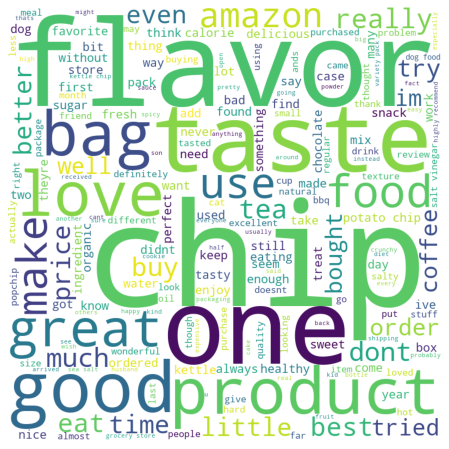

In [106]:
#Exibindo a WordCloud
plt.figure(figsize=(8,8))
plt.imshow(nuvem)
plt.axis('off')

### Obrigado,FIM